In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [3]:
file=pd.read_csv('sales_data_sample.csv',encoding='unicode_escape')
file['ORDERDATE'] = pd.to_datetime(file['ORDERDATE'])
file.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [5]:
file.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


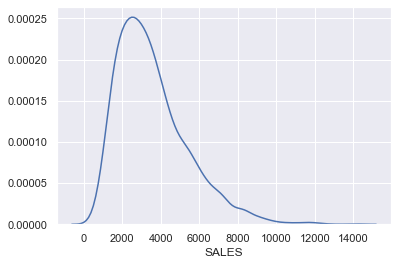

In [6]:
# Plotting revenue distribution
sns.set()
sns.distplot(file['SALES'],hist=False)

In [7]:
pd.qcut(file['SALES'],5)
file['SALES_BUCKETS']=pd.qcut(file['SALES'],5,labels=['Very Low','Low','Good','Very Good','Excellent'])
file['SALES_BUCKETS'].value_counts()
sales_status=file[['ORDERNUMBER','SALES_BUCKETS']].groupby(['ORDERNUMBER','SALES_BUCKETS']).agg({'SALES_BUCKETS':'count'})
sales_status.rename({'SALES_BUCKETS':'count'},axis='columns').reset_index() # Resetting 'revenue_buckets':count column-wise
sales_status[(sales_status != 0).all(1)] # dropping columns with 0

0       (2792.904, 3611.414]
1       (1998.808, 2792.904]
2       (3611.414, 4941.748]
3       (3611.414, 4941.748]
4        (4941.748, 14082.8]
                ...         
2818    (1998.808, 2792.904]
2819    (3611.414, 4941.748]
2820     (4941.748, 14082.8]
2821    (1998.808, 2792.904]
2822    (2792.904, 3611.414]
Name: SALES, Length: 2823, dtype: category
Categories (5, interval[float64]): [(482.129, 1998.808] < (1998.808, 2792.904] < (2792.904, 3611.414] < (3611.414, 4941.748] < (4941.748, 14082.8]]

Excellent    565
Good         565
Very Low     565
Very Good    564
Low          564
Name: SALES_BUCKETS, dtype: int64

,ORDERNUMBER,SALES_BUCKETS,count
0,10100,Very Low,2
1,10100,Low,0
2,10100,Good,1
3,10100,Very Good,0
4,10100,Excellent,1
...,...,...,...
1530,10425,Very Low,4
1531,10425,Low,1
1532,10425,Good,1
1533,10425,Very Good,4


SALES_BUCKETS
ORDERNUMBER SALES_BUCKETS               
10100       Very Low                   2
            Good                       1
            Excellent                  1
10101       Very Low                   1
            Low                        1
...                                  ...
10425       Very Low                   4
            Low                        1
            Good                       1
            Very Good                  4
            Excellent                  3

[1197 rows x 1 columns]

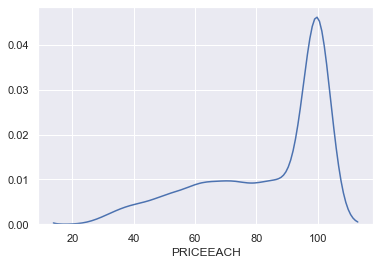

In [8]:
# Plotting 'UnitPrice' distribution
sns.set()
sns.distplot(file['PRICEEACH'],hist=False)

In [9]:
file['PRICEEACH_BUCKETS']=pd.qcut(file['PRICEEACH'].rank(method='first'), 5,labels=['Critical','Low','Medium','High','Very High'])
file['PRICEEACH_BUCKETS'].value_counts()
price_status=file[['ORDERNUMBER','PRICEEACH_BUCKETS']].groupby(['ORDERNUMBER','PRICEEACH_BUCKETS']).agg({'PRICEEACH_BUCKETS':'count'})
price_status.rename({'PRICEEACH_BUCKETS':'count'},axis='columns').reset_index() # Resetting 'revenue_buckets':count column-wise
price_status[(price_status != 0).all(1)] # dropping columns with 0

Very High    565
Medium       565
Critical     565
High         564
Low          564
Name: PRICEEACH_BUCKETS, dtype: int64

,ORDERNUMBER,PRICEEACH_BUCKETS,count
0,10100,Critical,1
1,10100,Low,1
2,10100,Medium,1
3,10100,High,1
4,10100,Very High,0
...,...,...,...
1530,10425,Critical,4
1531,10425,Low,0
1532,10425,Medium,3
1533,10425,High,3


PRICEEACH_BUCKETS
ORDERNUMBER PRICEEACH_BUCKETS                   
10100       Critical                           1
            Low                                1
            Medium                             1
            High                               1
10101       Critical                           2
...                                          ...
10424       High                               2
10425       Critical                           4
            Medium                             3
            High                               3
            Very High                          3

[1178 rows x 1 columns]

In [10]:
# Grouping 'revenue_buckets','price_buckets' with 'CustomerID':count function 
file[['ORDERNUMBER','SALES_BUCKETS','PRICEEACH_BUCKETS']].groupby(['SALES_BUCKETS','PRICEEACH_BUCKETS']).agg({'ORDERNUMBER':'count'})

ORDERNUMBER
SALES_BUCKETS PRICEEACH_BUCKETS             
Very Low      Critical                   382
              Low                        143
              Medium                      36
              High                         2
              Very High                    2
Low           Critical                   155
              Low                        188
              Medium                     118
              High                        37
              Very High                   66
Good          Critical                    27
              Low                        176
              Medium                     148
              High                        93
              Very High                  121
Very Good     Critical                     1
              Low                         57
              Medium                     152
              High                       176
              Very High                  178
Excellent     Critical                     0
              Low                          0
              Medium                     111
              High                       256
              Very High                  198

PRICEEACH_BUCKETS,Critical,Low,Medium,High,Very High
SALES_BUCKETS,,,,,
Very Low,0.676106,0.253097,0.063717,0.003540,0.003540
Low,0.274823,0.333333,0.209220,0.065603,0.117021
Good,0.047788,0.311504,0.261947,0.164602,0.214159
Very Good,0.001773,0.101064,0.269504,0.312057,0.315603
Excellent,0.000000,0.000000,0.196460,0.453097,0.350442


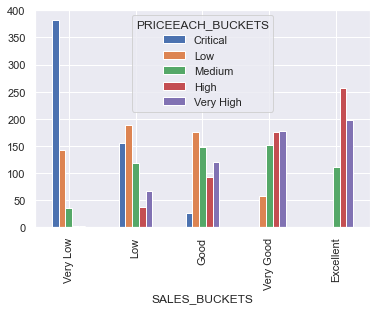

In [11]:
pd.crosstab(index=file['SALES_BUCKETS'],columns=file['PRICEEACH_BUCKETS']).apply(lambda x: x/x.sum(), axis=1)
file_rate=pd.crosstab(index=file['SALES_BUCKETS'],columns=file['PRICEEACH_BUCKETS'])
file_rate.plot.bar()

In [12]:
import math
# Creating new column 'final_revenue' to get continuous values for bins
file['FINAL_SALES']=file['SALES'].apply(lambda x: int(math.ceil(x/10))*10) 

In [ ]:
file.to_csv('Segmentation sales.csv',index=False)

In [13]:
sfile=pd.read_csv('Segmentation sales.csv',encoding='unicode_escape')
sfile['ORDERDATE'] = pd.to_datetime(sfile['ORDERDATE'])
sfile.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,SALES_BUCKETS,PRICEEACH_BUCKETS,FINAL_SALES
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NY,10022,USA,NaN,Yu,Kwai,Small,Good,Medium,2880
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,NaN,51100,France,EMEA,Henriot,Paul,Small,Low,Low,2770
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,Very Good,Medium,3890
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,CA,90003,USA,NaN,Young,Julie,Medium,Very Good,Low,3750
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,CA,NaN,USA,NaN,Brown,Julie,Medium,Excellent,Medium,5210


In [14]:
sfile['PRICEEACH'] = sfile['PRICEEACH'].apply(np.int64)

In [15]:
# Calculating unique items and countries in segmented data
print("number of unique status :",sfile.STATUS.nunique()) 
print("number of unique country:",sfile.COUNTRY.nunique())

number of unique status : 6
number of unique country: 19


In [16]:
sfile['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [17]:
# Assigning numerical values for 'Country' column
Labels = {'USA': 1,'France': 2,'Norway':3,'Australia':4,'Finland':5,'Austria':6,'UK':7,'Spain':8,'Sweden':9,'Singapore':10,
         'Canada':11,'Japan':12,'Italy':13,'Denmark':14,'Belgium':15,'Philippines':16,'Germany':17,'Switzerland':18,
         'Ireland':19} 

sfile.COUNTRY = [Labels[item] for item in sfile.COUNTRY] 

In [18]:
# Assigning numerical values to 'price_buckets'
M1= {'Critical':1,'Low':2,'Medium':3,'High':4,'Very High':5}
sfile.PRICEEACH_BUCKETS = [M1[item] for item in sfile.PRICEEACH_BUCKETS] 

In [19]:
# Assigning numerical values to 'revenue_buckets'
M2= {'Very Low':1,'Low':2,'Good':3,'Very Good':4,'Excellent':5}
sfile.SALES_BUCKETS = [M2[item] for item in sfile.SALES_BUCKETS] 

In [20]:
sfile['STATUS'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [21]:
# Assigning numerical values to 'revenue_buckets'
M3= {'Shipped':1,'Disputed':2,'In Process':3,'Cancelled':4,'On Hold':5,'Resolved':6}
sfile.STATUS = [M3[item] for item in sfile.STATUS] 

In [22]:
sfile['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [23]:
# Assigning numerical values to 'revenue_buckets'
M4= {'Small':1,'Medium':2,'Large':3}
sfile.DEALSIZE = [M4[item] for item in sfile.DEALSIZE] 

In [24]:
sfile.head(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,SALES_BUCKETS,PRICEEACH_BUCKETS,FINAL_SALES
0,10107,30,95,2,2871.00,2003-02-24,1,1,2,2003,...,NY,10022,1,NaN,Yu,Kwai,1,3,3,2880
1,10121,34,81,5,2765.90,2003-05-07,1,2,5,2003,...,NaN,51100,2,EMEA,Henriot,Paul,1,2,2,2770
2,10134,41,94,2,3884.34,2003-07-01,1,3,7,2003,...,NaN,75508,2,EMEA,Da Cunha,Daniel,2,4,3,3890


In [25]:
sfile = sfile.drop(columns=['SALES','STATE','POSTALCODE','TERRITORY','CONTACTLASTNAME','CONTACTFIRSTNAME'])

In [26]:
sfile.head(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,COUNTRY,DEALSIZE,SALES_BUCKETS,PRICEEACH_BUCKETS,FINAL_SALES
0,10107,30,95,2,2003-02-24,1,1,2,2003,Motorcycles,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,1,1,3,3,2880
1,10121,34,81,5,2003-05-07,1,2,5,2003,Motorcycles,...,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,2,1,2,2,2770
2,10134,41,94,2,2003-07-01,1,3,7,2003,Motorcycles,...,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,2,2,4,3,3890


In [27]:
sfile['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [28]:
# Assigning numerical values to 'revenue_buckets'
M5= {'Motorcycles':1,'Classic Cars':2,'Trucks and Buses':3,'Vintage Cars':4,'Planes':5,'Ships':6,'Trains':7}
sfile.PRODUCTLINE = [M5[item] for item in sfile.PRODUCTLINE] 

In [29]:
sfile = sfile.drop(columns=['CUSTOMERNAME','PHONE','ADDRESSLINE1','ADDRESSLINE2','CITY'])

In [30]:
sfile.head(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE,SALES_BUCKETS,PRICEEACH_BUCKETS,FINAL_SALES
0,10107,30,95,2,2003-02-24,1,1,2,2003,1,95,S10_1678,1,1,3,3,2880
1,10121,34,81,5,2003-05-07,1,2,5,2003,1,95,S10_1678,2,1,2,2,2770
2,10134,41,94,2,2003-07-01,1,3,7,2003,1,95,S10_1678,2,2,4,3,3890


In [31]:
sfile = sfile.drop(columns=['PRODUCTCODE'])

In [32]:
sfile.head(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE,SALES_BUCKETS,PRICEEACH_BUCKETS,FINAL_SALES
0,10107,30,95,2,2003-02-24,1,1,2,2003,1,95,1,1,3,3,2880
1,10121,34,81,5,2003-05-07,1,2,5,2003,1,95,2,1,2,2,2770
2,10134,41,94,2,2003-07-01,1,3,7,2003,1,95,2,2,4,3,3890


In [33]:
# Creating a new columns for 'InvoiceDate' to make easier calculations
sfile['dayofmonth'] = sfile.ORDERDATE.dt.day
sfile['dayofyear'] = sfile.ORDERDATE.dt.dayofyear
sfile['dayofweek'] = sfile.ORDERDATE.dt.dayofweek
sfile['weekofyear'] = sfile.ORDERDATE.dt.weekofyear
sfile.head() # Checking new train columns

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE,SALES_BUCKETS,PRICEEACH_BUCKETS,FINAL_SALES,dayofmonth,dayofyear,dayofweek,weekofyear
0,10107,30,95,2,2003-02-24,1,1,2,2003,1,95,1,1,3,3,2880,24,55,0,9
1,10121,34,81,5,2003-05-07,1,2,5,2003,1,95,2,1,2,2,2770,7,127,2,19
2,10134,41,94,2,2003-07-01,1,3,7,2003,1,95,2,2,4,3,3890,1,182,1,27
3,10145,45,83,6,2003-08-25,1,3,8,2003,1,95,1,2,4,2,3750,25,237,0,35
4,10159,49,100,14,2003-10-10,1,4,10,2003,1,95,1,2,5,3,5210,10,283,4,41


In [34]:
sfile = sfile.drop(columns="ORDERDATE")

Text(0.5, 0, 'Range')

Text(0, 0.5, 'Attributes')

Text(0.5, 1.0, 'Boxplot for all attributes')

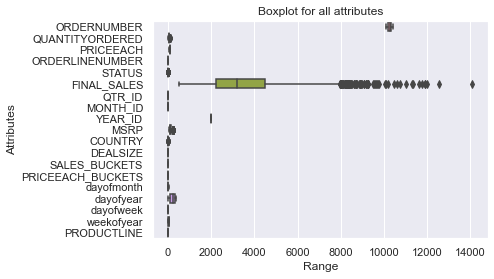

In [35]:
sns.set()
a1=['ORDERNUMBER','QUANTITYORDERED','PRICEEACH','ORDERLINENUMBER','STATUS','FINAL_SALES','QTR_ID','MONTH_ID','YEAR_ID','MSRP',
   'COUNTRY','DEALSIZE','SALES_BUCKETS','PRICEEACH_BUCKETS','dayofmonth','dayofyear','dayofweek','weekofyear','PRODUCTLINE']
a2=sfile[a1]
sns.boxplot(data=a2,orient='h')
plt.xlabel('Range')
plt.ylabel('Attributes')
plt.title('Boxplot for all attributes')
plt.show()

In [36]:
q1=sfile.quantile(0.25)
q3=sfile.quantile(0.75)
iqr=q3-q1
iqr

ORDERNUMBER           153.5
QUANTITYORDERED        16.0
PRICEEACH              32.0
ORDERLINENUMBER         6.0
STATUS                  0.0
QTR_ID                  2.0
MONTH_ID                7.0
YEAR_ID                 1.0
PRODUCTLINE             2.0
MSRP                   56.0
COUNTRY                 7.0
DEALSIZE                1.0
SALES_BUCKETS           2.0
PRICEEACH_BUCKETS       2.0
FINAL_SALES          2300.0
dayofmonth             15.0
dayofyear             216.0
dayofweek               3.0
weekofyear             31.0
dtype: float64

In [37]:
t=['ORDERNUMBER','QUANTITYORDERED','PRICEEACH','ORDERLINENUMBER','STATUS','FINAL_SALES','QTR_ID','MONTH_ID','YEAR_ID','MSRP',
   'COUNTRY','DEALSIZE','SALES_BUCKETS','PRICEEACH_BUCKETS','dayofmonth','dayofyear','dayofweek','weekofyear','PRODUCTLINE']

sfile_t= sfile[t]

sfile_out = sfile_t[~((sfile_t< (q1 - 1.5 * iqr)) |(sfile_t> (q3 + 1.5 * iqr))).any(axis=1)]

print ("When we have not removed any outliers from the dataset, we have " + str(len(sfile_t)) + " entries") 
print ("When we have removed outliers from the dataset, we have " + str(len(sfile_out)) + " entries")
print ("The proportion of outliers which exist when compared to the dataframe are: " + str(len(sfile_out)/len(sfile_t)))

When we have not removed any outliers from the dataset, we have 2823 entries
When we have removed outliers from the dataset, we have 2507 entries
The proportion of outliers which exist when compared to the dataframe are: 0.8880623450230252


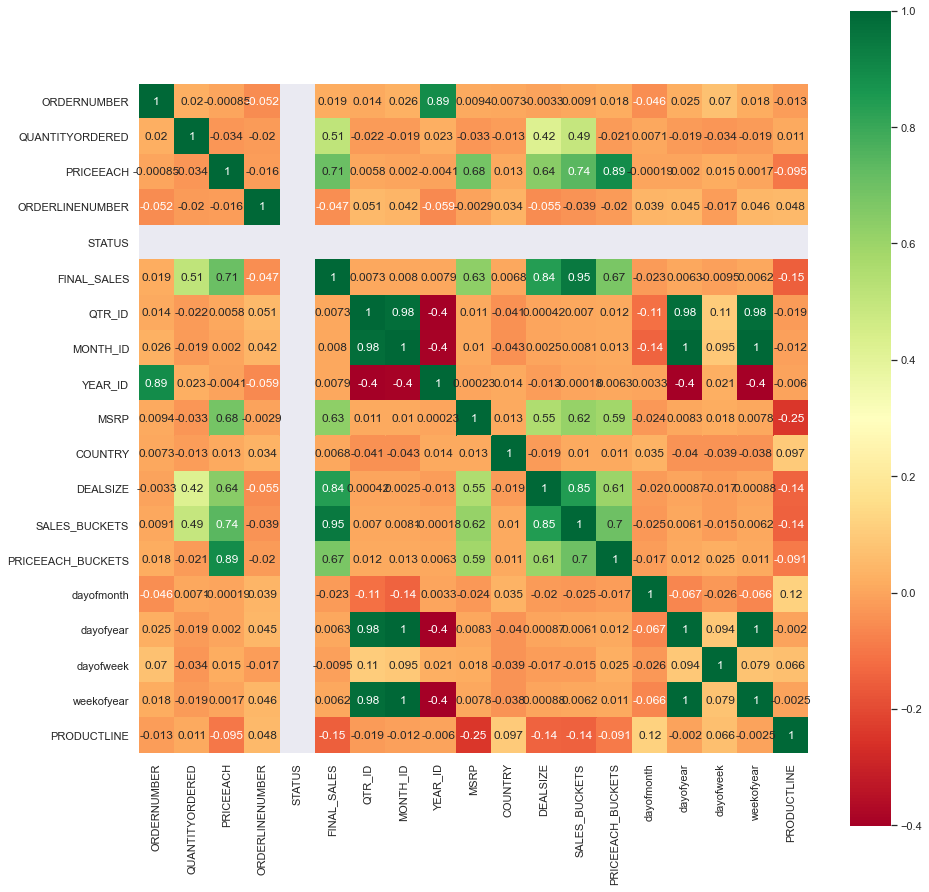

In [38]:

corl = sfile_out[t].corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corl, annot=True, cbar=True, square=True,ax=ax,cmap='RdYlGn')

In [39]:

c1=['ORDERNUMBER','QUANTITYORDERED','PRICEEACH','ORDERLINENUMBER','STATUS','QTR_ID','MONTH_ID','YEAR_ID','MSRP',
   'COUNTRY','DEALSIZE','SALES_BUCKETS','PRICEEACH_BUCKETS','dayofmonth','dayofyear','dayofweek','weekofyear','PRODUCTLINE']
X = sfile_out[c1]
y = sfile_out['FINAL_SALES']


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [42]:
print(regressor.intercept_)
print(regressor.coef_)

205691.7827568652
[ 1.04965091e+00  2.75137629e+01  3.39183796e+00 -3.22632899e+00
 -3.12638804e-13  2.81909901e+01  4.97617311e+02 -1.08824993e+02
  5.10111283e+00 -5.43410584e-01  3.30793463e+02  6.88549381e+02
  6.33484210e+01  1.70785429e+01 -2.68366215e+01  1.38895984e+01
  6.93142994e+01 -2.86073919e+00]


In [43]:
y_pred = regressor.predict(X_test)

In [44]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 459.3213637237375


In [45]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1948,2520,2370.772618
2073,2260,2315.184689
1888,3000,3245.797873
826,1180,1088.964551
487,4690,4561.033492
...,...,...
2282,2180,2084.859211
77,2230,2853.916937
384,4780,4601.536703
294,3500,3657.215752
